<a href="https://colab.research.google.com/github/soma2000-lang/Churn-/blob/main/employeee_churrn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn.metrics
import math
import datetime as dt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


In [3]:
data=pd.read_csv('/Churn.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [18]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [20]:
data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

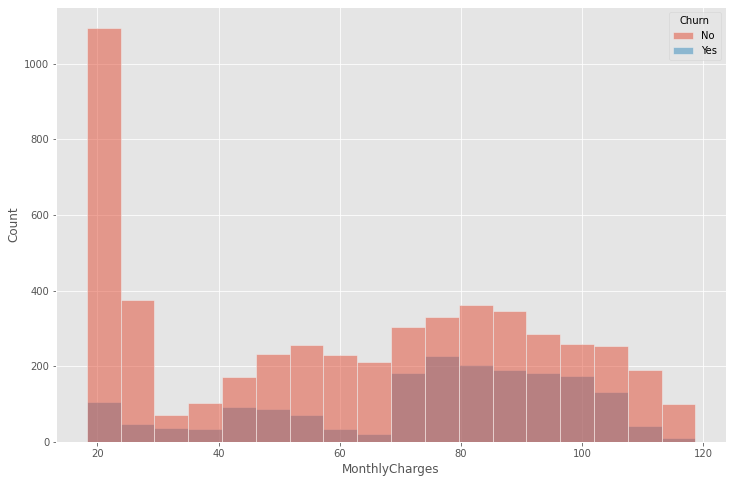

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(x='MonthlyCharges',data=data,hue='Churn')

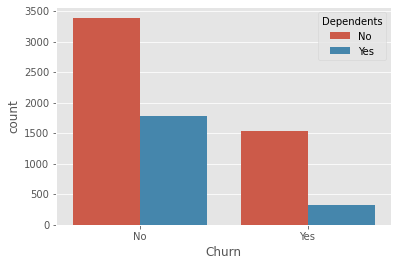

In [22]:
sns.countplot(data=data,x='Churn',hue='Dependents')

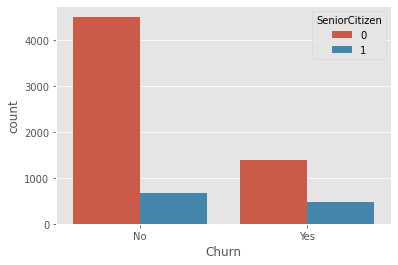

In [24]:
sns.countplot(data=data,x='Churn',hue='SeniorCitizen')

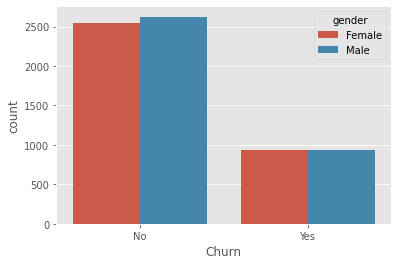

In [27]:
sns.countplot(data=data,x='Churn',hue='gender')

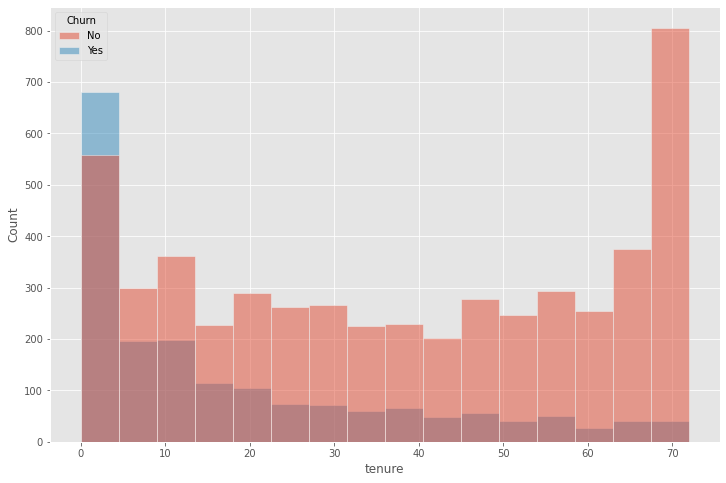

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(x='tenure',data=data,hue='Churn')

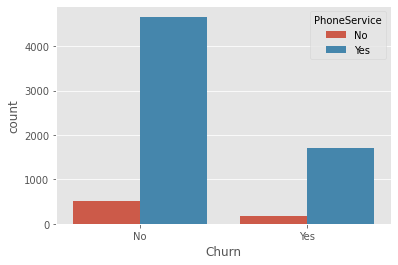

In [30]:
sns.countplot(data=data,x='Churn',hue='PhoneService')

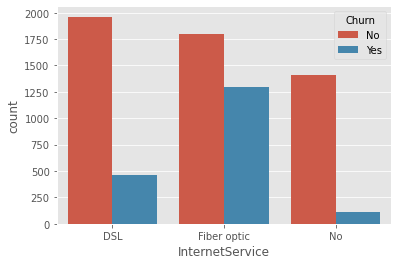

In [31]:
sns.countplot(x='InternetService',data=data,hue='Churn')

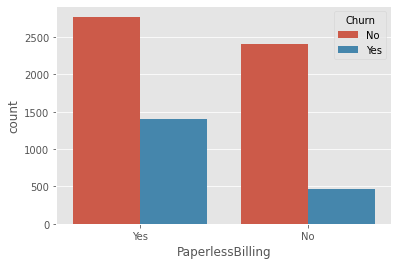

In [33]:
sns.countplot(x=data['PaperlessBilling'],hue=data['Churn'])
plt.show()

In [41]:
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [46]:
Gender_Category_map = {
    'Male' : 1,
    'Female': 0,
}

Partner_Category_map = {
    'Yes' : 1,
    'No': 0,
}
Dependents_Category_map = {
    'Yes' : 1,
    'No': 0,
}
PhoneService_Category_map = {
    'Yes' : 1,
    'No': 0,
}

OnlineSecurity_Category_map = {
    'Yes' : 1,
    'No': 0,
}
OnlineBackup_Category_map = {
    'Yes' : 1,
    'No': 0,
}
DeviceProtection_Category_map = {
    'Yes' : 1,
    'No': 0,
}
TechSupport_Category_map = {
    'Yes' : 1,
    'No': 0,
}
StreamingTV_Category_map = {
    'Yes' : 1,
    'NO': 0,
}
StreamingMovies_Category_map = {
    'Yes' : 1,
    'No': 0,
}
PaperlessBilling_Category_map = {
    'Yes' : 1,
    'No': 0,
}
Churn_Category_map = {
    'Yes' : 1,
    'No': 0,
}



data.loc[:, 'gender'] = data['gender'].map(Gender_Category_map)
data.loc[:, 'Partner'] = data['Partner'].map(Partner_Category_map)
data.loc[:, 'Dependents'] = data['Dependents'].map(Dependents_Category_map)
data.loc[:, 'PhoneService'] = data['PhoneService'].map(PhoneService_Category_map)
data.loc[:, 'OnlineSecurity'] = data['OnlineSecurity'].map(OnlineSecurity_Category_map)
data.loc[:, 'OnlineBackup'] = data['OnlineBackup'].map(OnlineBackup_Category_map)
data.loc[:, 'DeviceProtection'] = data['DeviceProtection'].map(DeviceProtection_Category_map)
data.loc[:, 'TechSupport'] = data['TechSupport'].map(TechSupport_Category_map)
data.loc[:, 'StreamingMovies'] = data['StreamingMovies'].map(StreamingMovies_Category_map)
data.loc[:, 'PaperlessBilling'] = data['PaperlessBilling'].map(PaperlessBilling_Category_map)
data.loc[:, 'Churn'] = data['Churn'].map(Churn_Category_map)

In [49]:

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0,NaN,NaN,1,NaN,No phone service,DSL,NaN,NaN,NaN,NaN,No,NaN,Month-to-month,NaN,Electronic check,29.85,29.85,NaN
1,5575-GNVDE,NaN,0,NaN,NaN,34,NaN,No,DSL,NaN,NaN,NaN,NaN,No,NaN,One year,NaN,Mailed check,56.95,1889.5,NaN
2,3668-QPYBK,NaN,0,NaN,NaN,2,NaN,No,DSL,NaN,NaN,NaN,NaN,No,NaN,Month-to-month,NaN,Mailed check,53.85,108.15,NaN
3,7795-CFOCW,NaN,0,NaN,NaN,45,NaN,No phone service,DSL,NaN,NaN,NaN,NaN,No,NaN,One year,NaN,Bank transfer (automatic),42.30,1840.75,NaN
4,9237-HQITU,NaN,0,NaN,NaN,2,NaN,No,Fiber optic,NaN,NaN,NaN,NaN,No,NaN,Month-to-month,NaN,Electronic check,70.70,151.65,NaN


get_dummies variable to convert the catergorical data to dummy datA

In [56]:



InternetService=data['InternetService']
InternetService=pd.get_dummies(InternetService,drop_first=True)
PaymentMethod=data['PaymentMethod']
PaymentMethod=pd.get_dummies(PaymentMethod,drop_first=True)

KeyError: ignored

In [51]:
data=data.drop(['Contract','MultipleLines','InternetService','PaymentMethod','StreamingTV'],axis=1)


In [57]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.85,29.85,NaN
1,5575-GNVDE,NaN,0,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.95,1889.5,NaN
2,3668-QPYBK,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.85,108.15,NaN
3,7795-CFOCW,NaN,0,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.30,1840.75,NaN
4,9237-HQITU,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.70,151.65,NaN
